In [397]:
import matplotlib.pyplot as plt          
from pprint import pprint                # human-readable data object printing (https://docs.python.org/3.5/library/pprint.html)
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
print('modules imported')

modules imported


In [398]:
df1=pd.read_csv('D:/Documents/diplom/data/galaxy.csv')
df2=pd.read_csv('D:/Documents/diplom/data/star.csv')
df3=pd.read_csv('D:/Documents/diplom/data/qso.csv')
df=pd.concat([df1, df2, df3], ignore_index=True)

In [399]:
df1=df1.dropna()
df2=df2.dropna()
df3=df3.dropna()

In [400]:
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df1.replace({'class':labels}, inplace = True)
df2.replace({'class':labels}, inplace = True)
df3.replace({'class':labels}, inplace = True)

In [401]:
df11=df1[(df1['psfMag_i']>=17) & ( df1['psfMag_i']<17.5)]
df11=df11.sample(3000)
df12=df1[(df1['psfMag_i']>=17.5) & ( df1['psfMag_i']<18)]
df12=df12.sample(3000)
df13=df1[(df1['psfMag_i']>=18) & ( df1['psfMag_i']<18.5)]
df13=df13.sample(3000)
df14=df1[(df1['psfMag_i']>=18.5) & ( df1['psfMag_i']<19)]
df14=df14.sample(3000)
df15=df1[(df1['psfMag_i']>=19) & ( df1['psfMag_i']<19.5)]
df15=df15.sample(3000)
df16=df1[(df1['psfMag_i']>=19.5) & ( df1['psfMag_i']<20)]
df16=df16.sample(3000)
df17=df1[(df1['psfMag_i']>=20) & ( df1['psfMag_i']<20.5)]
df17=df17.sample(3000)
df18=df1[(df1['psfMag_i']>=20.5) & ( df1['psfMag_i']<21)]
df18=df18.sample(3000)

In [402]:
galaxy=pd.concat([df11, df12, df13,df14,df15,df16,df17,df18 ], ignore_index=True)
galaxy.head()

,specObjID,mjd,z,zErr,class,subClass,ra,dec,objID,obj,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,2.492854e+18,53794,0.046830,0.000013,2,STARFORMING,168.226340,28.000764,1.237667e+18,175.0,19.31826,18.07397,17.43640,17.13822,16.83783,16.90090,15.42760,14.87280,14.54233,14.21699
1,2.931998e+18,54484,0.107388,0.000022,2,BROADLINE,199.100930,17.810786,1.237669e+18,533.0,20.96210,19.03283,17.91157,17.41227,17.10114,19.53960,17.81668,16.72935,16.26477,15.94412
2,7.062913e+18,56243,0.110434,0.000018,2,STARFORMING,30.509623,29.668762,1.237680e+18,227.0,20.56769,18.84073,17.86699,17.48035,17.12382,18.94389,17.42863,16.68942,16.29349,15.99386
3,2.643705e+18,53757,0.094012,0.000017,2,AGN,151.738140,29.444674,1.237665e+18,241.0,20.20121,18.30848,17.40326,17.01107,16.64134,18.64323,16.86745,15.92572,15.53301,15.31248
4,3.277713e+17,51928,0.081368,0.000016,2,BROADLINE,191.056960,0.701555,1.237671e+18,215.0,20.50037,18.87215,17.78273,17.43141,17.13788,19.51352,17.48334,16.55828,16.12012,15.80512


In [403]:
df21=df2[(df2['psfMag_i']>=17) & ( df2['psfMag_i']<17.5)]
df21=df21.sample(3000)
df22=df2[(df2['psfMag_i']>=17.5) & ( df2['psfMag_i']<18)]
df22=df22.sample(3000)
df23=df2[(df2['psfMag_i']>=18) & ( df2['psfMag_i']<18.5)]
df23=df23.sample(3000)
df24=df2[(df2['psfMag_i']>=18.5) & ( df2['psfMag_i']<19)]
df24=df24.sample(3000)
df25=df2[(df2['psfMag_i']>=19) & ( df2['psfMag_i']<19.5)]
df25=df25.sample(3000)
df26=df2[(df2['psfMag_i']>=19.5) & ( df2['psfMag_i']<20)]
df26=df26.sample(3000)
df27=df2[(df2['psfMag_i']>=20) & ( df2['psfMag_i']<20.5)]
df27=df27.sample(3000)
df28=df2[(df2['psfMag_i']>=20.5) & ( df2['psfMag_i']<21)]
df28=df28.sample(3000)

In [404]:
star=pd.concat([df21, df22, df23,df24,df25,df26,df27,df28 ], ignore_index=True)
star.head()

,specObjID,mjd,z,zErr,class,subClass,ra,dec,objID,obj,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,1.893830e+18,53173,-0.000117,0.000010,1,K3,240.835570,35.160100,1.237662e+18,154.0,19.81085,18.14597,17.41704,17.15345,16.98034,19.74499,17.95824,17.16358,16.82082,16.61309
1,2.485020e+18,53558,-0.000396,0.000024,1,M5,248.821500,17.499492,1.237665e+18,485.0,23.66274,20.96328,19.50988,17.48802,16.37670,21.64381,20.96655,19.50430,17.48608,16.38100
2,3.070414e+18,54414,0.000153,0.000010,1,G2,104.679650,11.958560,1.237674e+18,707.0,19.24937,18.03333,17.57656,17.37598,17.28618,19.26074,18.03773,17.57248,17.37600,17.29871
3,2.627962e+18,53730,0.000038,0.000012,1,F9,50.927538,6.466590,1.237670e+18,194.0,19.87070,18.21916,17.47662,17.18795,16.96807,19.80987,18.20998,17.48002,17.18553,16.92752
4,2.951065e+18,54380,-0.000169,0.000014,1,F9,341.728540,29.484569,1.237673e+18,117.0,18.99598,17.86927,17.34472,17.11162,17.01894,19.02267,17.87277,17.34621,17.12428,17.02181


In [405]:
df31=df3[(df3['psfMag_i']>=17) & ( df3['psfMag_i']<17.5)]
df31=df31.sample(3000)
df32=df3[(df3['psfMag_i']>=17.5) & ( df3['psfMag_i']<18)]
df32=df32.sample(3000)
df33=df3[(df3['psfMag_i']>=18) & ( df3['psfMag_i']<18.5)]
df33=df33.sample(3000)
df34=df3[(df3['psfMag_i']>=18.5) & ( df3['psfMag_i']<19)]
df34=df34.sample(3000)
df35=df3[(df3['psfMag_i']>=19) & ( df3['psfMag_i']<19.5)]
df35=df35.sample(3000)
df36=df3[(df3['psfMag_i']>=19.5) & ( df3['psfMag_i']<20)]
df36=df36.sample(3000)
df37=df3[(df3['psfMag_i']>=20) & ( df3['psfMag_i']<20.5)]
df37=df37.sample(3000)
df38=df3[(df3['psfMag_i']>=20.5) & ( df3['psfMag_i']<21)]
df38=df38.sample(3000)

In [406]:
qso=pd.concat([df31, df32, df33,df34,df35,df36,df37,df38], ignore_index=True)
qso.head()

,specObjID,mjd,z,zErr,class,subClass,ra,dec,objID,obj,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,cModelMag_u,cModelMag_g,cModelMag_r,cModelMag_i,cModelMag_z
0,8.000716e+18,56663,0.151690,0.000023,3,STARBURST BROADLINE,178.73491,61.614868,1.237654e+18,9.0,18.49203,18.20766,17.77685,17.25899,17.23493,18.39229,17.97903,17.23823,16.79608,16.50875
1,8.434417e+17,52226,1.286693,0.000201,3,BROADLINE,358.86536,15.160566,1.237656e+18,114.0,17.49598,17.40450,17.09127,17.00725,17.00974,17.48729,17.37569,17.08510,17.00756,17.00949
2,1.628168e+18,53080,0.862112,0.000189,3,BROADLINE,177.78880,47.482146,1.237661e+18,70.0,17.48582,17.17956,17.11083,17.19758,17.16441,17.48721,17.17811,17.10613,17.19093,17.11247
3,6.025165e+17,51999,0.304887,0.000027,3,STARBURST BROADLINE,218.81521,2.539320,1.237652e+18,44.0,17.30555,17.14761,16.91123,17.12698,16.26370,17.33061,17.15448,16.90289,17.11216,16.26563
4,9.597250e+18,57656,0.409735,0.000022,3,STARBURST BROADLINE,247.22458,41.389556,1.237655e+18,53.0,17.88737,17.59815,17.50183,17.35841,16.90259,17.88403,17.55934,17.47338,17.31361,16.87751


In [407]:
result=pd.concat([galaxy, star, qso ], ignore_index=True)

In [408]:
#result.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)

In [409]:
result=result.dropna()

In [410]:
result.isnull().sum()

specObjID      0
mjd            0
z              0
zErr           0
class          0
subClass       0
ra             0
dec            0
objID          0
obj            0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
cModelMag_u    0
cModelMag_g    0
cModelMag_r    0
cModelMag_i    0
cModelMag_z    0
dtype: int64

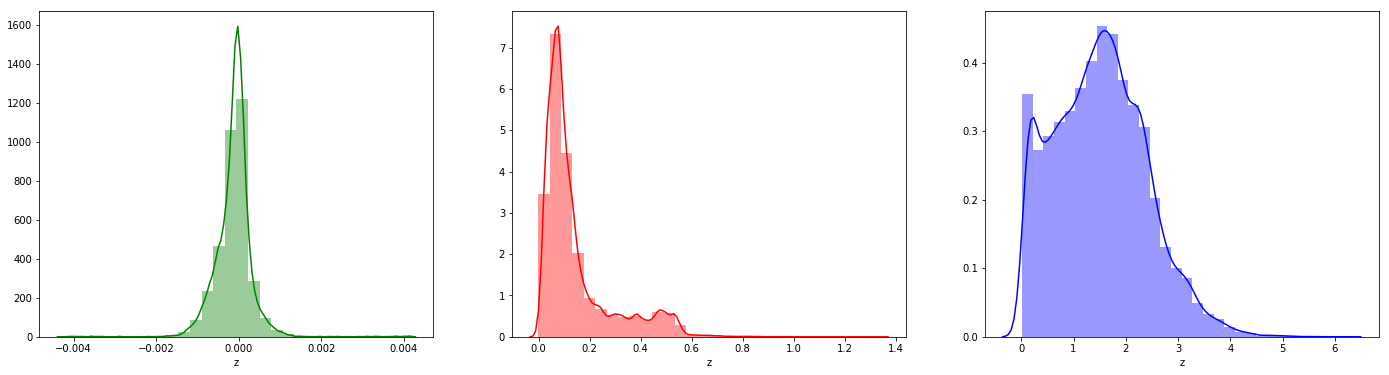

In [411]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(result[result['class'] == 1].z, ax = ax1, bins = 30, color = 'g')
sns.distplot(result[result['class'] == 2].z, ax = ax2, bins = 30, color = 'r')
sns.distplot(result[result['class'] == 3].z, ax = ax3, bins = 30, color = 'b')

In [412]:
# fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(nrows=2, ncols=6, figsize = (25, 12))
# #sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = result)
# sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = result)
# sns.boxplot(ax=ax3, x = 'class', y = 'psfMag_u', hue = 'class', data = result)
# sns.boxplot(ax=ax4, x = 'class', y = 'psfMag_g', hue = 'class', data = result)
# sns.boxplot(ax=ax5, x = 'class', y = 'psfMag_r', hue = 'class', data = result)
# sns.boxplot(ax=ax6, x = 'class', y = 'psfMag_i', hue = 'class',data = result)
# sns.boxplot(ax=ax7, x = 'class', y = 'psfMag_z', hue = 'class', data = result)
# sns.boxplot(ax=ax8, x = 'class', y = 'z', hue = 'class', data = result)
# sns.boxplot(ax=ax9, x = 'class', y = 'cModelMag_u', hue = 'class', data = result)
# sns.boxplot(ax=ax10, x = 'class', y = 'cModelMag_g', hue = 'class', data = result)
# sns.boxplot(ax=ax11, x = 'class', y = 'cModelMag_r', hue = 'class', data = result)
# sns.boxplot(ax=ax12, x = 'class', y = 'cModelMag_i', hue = 'class', data = result)
# sns.boxplot(ax=ax1, x = 'class', y = 'cModelMag_z', hue = 'class', data = result)

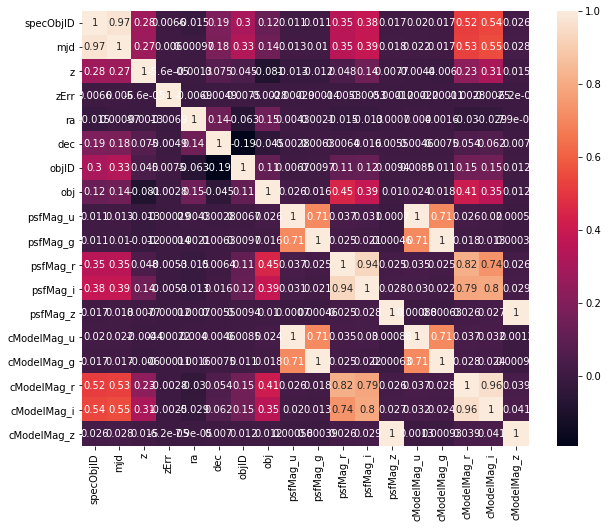

In [413]:
corr = result.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

In [414]:
result.shape[0]

72000

In [415]:
# pca = PCA(n_components = 3)
# result_pca = pca.fit_transform(result[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'cModelMag_u', 'cModelMag_g', 'cModelMag_r', 'cModelMag_i', 'cModelMag_z']])

# result = pd.concat((result, pd.DataFrame(result_pca)), axis = 1)
# result.rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
# result.drop(['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'cModelMag_u', 'cModelMag_g', 'cModelMag_r', 'cModelMag_i', 'cModelMag_z'], axis = 1, inplace = True)
# result.head(3)

In [416]:
result.isnull().sum()

specObjID      0
mjd            0
z              0
zErr           0
class          0
subClass       0
ra             0
dec            0
objID          0
obj            0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
cModelMag_u    0
cModelMag_g    0
cModelMag_r    0
cModelMag_i    0
cModelMag_z    0
dtype: int64

In [417]:
# labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
# galaxy.replace({'class':labels}, inplace = True)
# star.replace({'class':labels}, inplace = True)
# qso.replace({'class':labels}, inplace = True)

In [418]:
train=df.sample(100000)
train=(train[~train.specObjID.isin(result.specObjID)])
train.replace({'class':labels}, inplace = True)
train.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
train=train.dropna()

X_train= train.drop('class', axis = 1).values
y_train = train['class'].values


In [419]:
galaxy.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
star.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
qso.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)

In [420]:
X1 = galaxy.drop('class', axis = 1).values
y1 = galaxy['class'].values
X2 = star.drop('class', axis = 1).values
y2 = star['class'].values
X3 = qso.drop('class', axis = 1).values
y3 = qso['class'].values

In [421]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 123)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 123)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 123)

In [422]:
# X_train=np.concatenate((X1_train, X2_train, X3_train), axis=0)
# y_train=np.concatenate((y1_train, y2_train, y3_train), axis=0)
X_test=np.concatenate((X1, X2, X3), axis=0)
y_test=np.concatenate((y1, y2, y3), axis=0)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [423]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [424]:
lr = LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n')
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 

              precision    recall  f1-score   support

           1       0.98      0.98      0.98     24000
           2       0.89      0.97      0.93     24000
           3       0.99      0.90      0.94     24000

   micro avg       0.95      0.95      0.95     72000
   macro avg       0.95      0.95      0.95     72000
weighted avg       0.95      0.95      0.95     72000

Confusion Matrix: 

[[23413   587     0]
 [  478 23272   250]
 [   79  2413 21508]]
('Training Score: ', 0.959971320061393)
('Testing Score: ', 0.947125)


In [425]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n')
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     24000
           2       0.93      0.99      0.96     24000
           3       0.99      0.92      0.96     24000

   micro avg       0.97      0.97      0.97     72000
   macro avg       0.97      0.97      0.97     72000
weighted avg       0.97      0.97      0.97     72000

Confusion Matrix: 

[[23810    86   104]
 [   90 23851    59]
 [   40  1775 22185]]
('Training Score: ', 0.979442309631306)
('Testing Score: ', 0.9700833333333333)


## Далее считаю для каждого бина

In [426]:
test1=pd.concat([df11, df21, df31 ], ignore_index=True)
test1.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest1 = test1.drop('class', axis = 1).values
ytest1 = test1['class'].values
ytest1=ytest1.astype('int')
test2=pd.concat([df12, df22, df32 ], ignore_index=True)
test2.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest2 = test2.drop('class', axis = 1).values
ytest2 = test2['class'].values
ytest2=ytest2.astype('int')
test3=pd.concat([df13, df23, df33 ], ignore_index=True)
test3.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest3 = test3.drop('class', axis = 1).values
ytest3 = test3['class'].values
ytest3=ytest3.astype('int')
test4=pd.concat([df14, df24, df34 ], ignore_index=True)
test4.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest4 = test4.drop('class', axis = 1).values
ytest4 = test4['class'].values
test5=pd.concat([df15, df25, df35 ], ignore_index=True)
test5.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest5 = test5.drop('class', axis = 1).values
ytest5 = test5['class'].values
test6=pd.concat([df16, df26, df36 ], ignore_index=True)
test6.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest6 = test6.drop('class', axis = 1).values
ytest6 = test6['class'].values
test7=pd.concat([df17, df27, df37 ], ignore_index=True)
test7.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest7 = test7.drop('class', axis = 1).values
ytest7 = test7['class'].values
test8=pd.concat([df18, df28, df38 ], ignore_index=True)
test8.drop(['subClass','specObjID','objID'],   axis=1, inplace=True)
Xtest8 = test8.drop('class', axis = 1).values
ytest8 = test8['class'].values

In [427]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(Xtest1)
print('Classification Report: \n')
print(classification_report(ytest1, y_pred))

Classification Report: 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3000
           2       0.00      0.00      0.00      3000
           3       0.33      1.00      0.50      3000

   micro avg       0.33      0.33      0.33      9000
   macro avg       0.11      0.33      0.17      9000
weighted avg       0.11      0.33      0.17      9000



In [428]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred = svc.predict(Xtest2)
print('Classification Report: \n')
print(classification_report(ytest2, y_pred))

Classification Report: 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3000
           2       0.00      0.00      0.00      3000
           3       0.33      1.00      0.50      3000

   micro avg       0.33      0.33      0.33      9000
   macro avg       0.11      0.33      0.17      9000
weighted avg       0.11      0.33      0.17      9000



In [429]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred = svc.predict(Xtest3)
print('Classification Report: \n')
print(classification_report(ytest3, y_pred))

Classification Report: 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3000
           2       0.00      0.00      0.00      3000
           3       0.33      1.00      0.50      3000

   micro avg       0.33      0.33      0.33      9000
   macro avg       0.11      0.33      0.17      9000
weighted avg       0.11      0.33      0.17      9000



In [430]:
print(y_pred)

[3 3 3 ... 3 3 3]


In [431]:
print(ytest1)

[2 2 2 ... 3 3 3]


In [432]:
1 in y_pred

False

In [433]:
print(type(y_pred))

<type 'numpy.ndarray'>


In [434]:
test1.shape[0]

9000